<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Normalized_ORG_RUN_Regression_Spatial_temporal_graph_neural_networkV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 84.9 GB  |     Proc size: 3.3 GB
GPU RAM Free: 39968MB | Used: 545MB | Util   1% | Total     40960MB


In [ ]:
!pip install lightning torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 33.9 MB/s eta 0:00:00


In [ ]:
!pip install torch --upgrade

In [ ]:
!pip uninstall torch torchvision torchaudio transformers


Found existing installation: torch 2.2.0
Uninstalling torch-2.2.0:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.2.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.2.0
Found existing installation: torchvision 0.16.0+cu121
Uninstalling torchvision-0.16.0+cu121:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchvision-0.16.0+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libcudart.7ec1eba6.so.12
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libnvjpeg.f00ca762.so.12
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libpng16.7f

In [ ]:
!pip install torch torchvision torchaudio transformers

  Using cached torch-2.2.0-cp310-cp310-manylinux1_x86_64.whl (755.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 100.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires torch<2.2,>=1.10, but you have torch 2.2.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.2.0 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.2.0 which is incompatible.


In [ ]:
# Standard libraries
import os

# For downloading pre-trained models
import urllib.request
from urllib.error import HTTPError

# PyTorch Lightning
import lightning as L

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# PyTorch geometric
import torch_geometric
import torch_geometric.data as geom_data
import torch_geometric.nn as geom_nn

# PL callbacks
from lightning.pytorch.callbacks import ModelCheckpoint
from torch import Tensor

AVAIL_GPUS = min(1, torch.cuda.device_count())
#BATCH_SIZE = 256 if AVAIL_GPUS else 64
BATCH_SIZE = 1 if AVAIL_GPUS else 64
# Path to the folder where the datasets are/should be downloaded
DATASET_PATH = os.environ.get("PATH_DATASETS", "data/")
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = "/content/drive/MyDrive/DroughtCastAI/Dataset/GNNs"

# Setting the seed
L.seed_everything(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Import Graph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
# spatial-temporal edges
Graph = pickle.load(open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedX1.pickle', 'rb'))

# spatial-temporal edges
Graphy = pickle.load(open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2_normalized_1month_selectedY1.pickle', 'rb'))

In [ ]:
Graph.nodes[36986]

{'row_index': 36986,
 'Month': 202211,
 'Lat': -33.238,
 'Lon': 18.865,
 'Lat_nom': 0.0,
 'Lon_nom': 0.5263211858448558,
 'temperature_2m': 0.4952498070987658,
 'temperature_2m_min': 0.5546942683872143,
 'temperature_2m_max': 0.6508211317768104,
 'dewpoint_temperature_2m': 0.604377704250445,
 'total_precipitation_sum': 0.0144451848511847,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.0178303713389214,
 'u_component_of_wind_10m': 0.5135674951104923,
 'v_component_of_wind_10m': 0.4987945801799406,
 'surface_net_solar_radiation_sum': 0.7802372071127209,
 'total_evaporation_sum': 0.8615671690632722,
 'soil_moisture_am': 0.1431131537144707,
 'soil_moisture_pm': 0.1428330811346103,
 'NDVI': 0.3818963898195212,
 'EVI': 0.291882789894304,
 'next_month_tempreature': 0.4275101180905905,
 'next_month_precipitation': 0.0111730676234768,
 'year': 0.875,
 'month2': 0.9090909090909092,
 'spei01': 0.4039815,
 'next_month_soil_moisture_am': 0.210090837587329,
 'next_month_spei01': 0.68

In [ ]:
len(Graph.nodes)

83580

In [ ]:
len(Graph.nodes[36986])

28

**Convert Graph into pytorch geometric dataset**

1. Create torch_geometric.data

In [ ]:
#EDGE INDEX FOR FULL DATASET
# Extract edge list
edge_list = list(Graph.edges())




# Convert edge list to a 2D tensor
edge_index = torch.tensor(edge_list, dtype=torch.long)
edge_index = edge_index.t().contiguous()

# Ensure the tensor shape is [2, num_edges]

edge_index = edge_index.view(2, -1)


spei01_features = [Graph.nodes[node]['next_month_spei01'] for node in Graph.nodes()]



# Convert to a tensor
y = torch.tensor(spei01_features, dtype=torch.float)

#feature_names = [ 'Lat_nom', 'Lon_nom', 'temperature_2m', 'temperature_2m_min',
#                 'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
#                 'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
#                 'v_component_of_wind_10m', 'surface_net_solar_radiation_sum', 'total_evaporation_sum',
#                 'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI', 'next_month_tempreature',
#                 'next_month_precipitation', 'year', 'month2', "spei01"]

# feature_names = [  'Month', 'Lat', 'Lon','Lat_nom', 'Lon_nom','temperature_2m',  'u_component_of_wind_10m',
#                  'v_component_of_wind_10m', 'surface_net_solar_radiation_sum', 'total_evaporation_sum',
#                  'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI', 'next_month_tempreature',
#                  'next_month_precipitation',    'spei01' ]

feature_names = [   'temperature_2m',  'u_component_of_wind_10m',
                 'v_component_of_wind_10m', 'surface_net_solar_radiation_sum', 'total_evaporation_sum',
                 'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI', 'next_month_tempreature',
                 'next_month_precipitation',    'spei01' ]



# feature_names = [   'temperature_2m', 'temperature_2m_min',
#                 'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
#                 'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
#                 'v_component_of_wind_10m', 'surface_net_solar_radiation_sum', 'total_evaporation_sum',
#                 'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI', 'next_month_tempreature',
#                 'next_month_precipitation',   "spei01"]


#Extract the features for each node
node_features = []
for node in Graph.nodes():
    node_feature_values = [Graph.nodes[node].get(feature) for feature in feature_names]  # Defaulting missing values to 0
    node_features.append(node_feature_values)

# Convert to a PyTorch tensor
x = torch.tensor(node_features, dtype=torch.float)



train_months = [201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912,
202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
202009, 202010, 202011, 202012, 202101, 202102]
val_months = [202103, 202104, 202105, 202106, 202107, 202108, 202109,
202110, 202111, 202112, 202201, 202202, 202203, 202204, 202205]
test_months = [202206, 202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308]


# train_months = [201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
# 201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
# 201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
# 201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
# 201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
# 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
# 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912,
# 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
# 202009, 202010, 202011, 202012, 202101, 202102, 202104, 202106,
# 202108,202110, 202112, 202202, 202204, 202207, 202209,202211,202301,202303, 202305,202307]
# test_months = [202103, 202105,  202107, 202109,
# 202111, 202201, 202203, 202205]
# val_months = [202206, 202208, 202210,   202212,   202302,  202304,  202306, 202307, 202308]

emb_months=[201505]
emb_mask_list = []

for node in Graph.nodes():
    is_in_emb_months = Graph.nodes[node]['Month'] in emb_months
    emb_mask_list.append(is_in_emb_months)

emb_mask = torch.tensor(emb_mask_list, dtype=torch.bool)
train_mask_list = []

for node in Graph.nodes():
    is_in_train_months = Graph.nodes[node]['Month'] in train_months
    train_mask_list.append(is_in_train_months)

train_mask = torch.tensor(train_mask_list, dtype=torch.bool)

val_mask_list = []

for node in Graph.nodes():
    is_in_val_months = Graph.nodes[node]['Month'] in val_months
    val_mask_list.append(is_in_val_months)

val_mask = torch.tensor(val_mask_list, dtype=torch.bool)

test_mask_list = []

for node in Graph.nodes():
    is_in_test_months = Graph.nodes[node]['Month'] in test_months
    test_mask_list.append(is_in_test_months)

test_mask = torch.tensor(test_mask_list, dtype=torch.bool)

graph_data = torch_geometric.data.Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask, val_mask=val_mask, test_mask=test_mask, emb_mask=emb_mask)

In [ ]:
graph_data

Data(x=[83580, 12], edge_index=[2, 129700], y=[83580], train_mask=[83580], val_mask=[83580], test_mask=[83580], emb_mask=[83580])

In [ ]:
print(train_mask)

tensor([ True,  True,  True,  ..., False, False, False])


2. Create dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class GraphDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.num_node_features = data.x.size(1)

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        return self.data

In [ ]:
graph_dataset = GraphDataset(graph_data)

In [ ]:
graph_dataset.data

Data(x=[83580, 12], edge_index=[2, 129700], y=[83580], train_mask=[83580], val_mask=[83580], test_mask=[83580], emb_mask=[83580])

In [ ]:
graph_dataset.__getitem__(0)

Data(x=[83580, 12], edge_index=[2, 129700], y=[83580], train_mask=[83580], val_mask=[83580], test_mask=[83580], emb_mask=[83580])

In [ ]:
graph_dataset.num_node_features

12

## Graph Neural Network

**1. Setup GNN Module**

In [ ]:
gnn_layer_by_name = {"GCN": geom_nn.GCNConv, "GAT": geom_nn.GATConv, "GraphConv": geom_nn.GraphConv, "SAGEConv": geom_nn.SAGEConv, "GAT2": geom_nn.GATv2Conv}

In [ ]:
import numpy as np

def graph2sequences(x):
  int number_of_nodes=836   #batch_size
  int number_of_time_steps=100  #time steps/sequence length
  int number of features per step
  temporal_sequences = torch.randn(number_of_node, number_of_time_steps,   x.shape[1])  #  nodes, time steps, features feature per step



  # Reshape X to generate the sequence of temporal sequences
  temporal_sequences = np.zeros((number_of_nodes, number_of_time_steps, number_of_features))

  for node in range(number_of_nodes):
      for time_step in range(number_of_time_steps):
          temporal_sequences[node, time_step, :] = x[node + time_step * number_of_nodes, :]

  print("Temporal sequences shape:", temporal_sequences.shape)

  return temporal_sequences



In [ ]:
class GNNModel(nn.Module):
    def __init__(
        self,
        c_in,
        c_out,
        num_layers=1,
        layer_name="GCN",
        dp_rate=0.32,
        **kwargs,
    ):
        """GNNModel.

        Args:
            c_in: Dimension of input features
            c_hidden: Dimension of hidden features
            c_out: Dimension of the output features. Usually number of classes in classification
            num_layers: Number of "hidden" graph layers
            layer_name: String of the graph layer to use
            dp_rate: Dropout rate to apply throughout the network
            kwargs: Additional arguments for the graph layer (e.g. number of heads for GAT)

        """
        super().__init__()
        input_dim = 12
        hidden_dim=7
        output_dim = 1

        layers = []
   #     Layer 1  GAT
        gnn_layer1= geom_nn.GATv2Conv
        layers += [
            gnn_layer1(input_dim, hidden_dim),
            nn.Tanh(),
           nn.Dropout(dp_rate)
        ]
       # Layer 2  GraphSAGE
        gnn_layer2= geom_nn.SAGEConv
        layers += [
            gnn_layer2(hidden_dim, hidden_dim),
            nn.Tanh(),

            nn.Dropout(dp_rate)
        ]

        #Layer 3&4 Post-Message Passing

        mp_layer = nn.Sequential(
            nn.LSTM(input_size=hidden_dim, hidden_size=hidden_dim, batch_first=True)
            nn.Tanh(),
            nn.Dropout(dp_rate),
            nn.Linear(hidden_dim, output_dim)
        )
        self.post_mp = mp_layer

        print("GNN layers:")
        print(layers)
        self.layers = nn.ModuleList(layers)
        print("Post layers:")
        print(mp_layer)

    def forward(self, x, edge_index):
        """Forward.

        Args:
            x: Input features per node,data.x
            edge_index: data.edge_indexList of vertex index pairs representing the edges in the graph (PyTorch geometric notation)
        """
        i=0
        # process EMB GNN Layer
        for layer in self.layers:
            # For graph layers, we need to add the "edge_index" tensor as additional input
            # All PyTorch Geometric graph layer inherit the class "MessagePassing", hence
            # we can simply check the class type.
          # print("layer", i);
            i+=1
          #  print(layer)
            if isinstance(layer, geom_nn.MessagePassing):
                x = layer(x, edge_index)
                emb=x
            elif isinstance(layer, nn.LSTM):
                x = layer(x)
                sequences = graph2sequences(x)
                output, (hn, cn) = layer(sequences)
                x =  output.reshape(output_shape[0] * output_shape[1], output_shape[2])
            else:
                x = layer(x)
        # process Post MP Layer
        x = self.post_mp(x)
       # print("----x:")
       # print(x)
       # print(x.size())
        return x, emb

In [ ]:
global GModel

**2. Define Lightning Module - NodeLevelRegressionGNN**

LightningModule organizes your PyTorch code into 6 sections:

1. Initialization (__init__ and setup()).

2. Train Loop (training_step())

3. Validation Loop (validation_step())

4. Test Loop (test_step())

5. Prediction Loop (predict_step())

6. Optimizers and LR Schedulers (configure_optimizers())

In [ ]:
loss_list = []

class NodeLevelRegressionGNN(L.LightningModule):
    def __init__(self, model_name, **model_kwargs):
        super().__init__()
        # Saving hyperparameters
        self.save_hyperparameters()

        # Initialize the model
        self.model = GNNModel(**model_kwargs)  # Ensure GNNModel outputs continuous values

        # Use Mean Squared Error Loss for regression
        self.loss_module = nn.MSELoss()
       # self.loss_module = nn.L1Loss()

    def forward(self, data, mode="train"):

        x, edge_index = data.x, data.edge_index
        #call model forward function
        x, emb = self.model(x, edge_index)

        global x_tensor, x_tensor_test, x_tensor_val
        global y_tensor, y_tensor_test, y_tensor_val
        global x_tensor_emb, x_tensor_test_emb, x_tensor_val_emb
        global y_tensor_emb, y_tensor_test_emb, y_tensor_val_emb
        # x_tensor = x
        # y_tensor = data.y
        mask2 = data.emb_mask
        # Only calculate the loss on the nodes corresponding to the mask
        if mode == "train":
            mask = data.train_mask
            x_tensor = x[mask]
            y_tensor = data.y[mask]
            x_tensor_emb = emb[mask]
            y_tensor_emb = data.y[mask]
        elif mode == "val":
            mask = data.val_mask
            x_tensor_val = x[mask]
            y_tensor_val = data.y[mask]
            x_tensor_val_emb = emb[mask]
            y_tensor_val_emb = data.y[mask]
        elif mode == "test":
            mask = data.test_mask
            x_tensor_test = x[mask]
            y_tensor_test = data.y[mask]
            x_tensor_test_emb = emb[mask]
            y_tensor_test_emb = data.y[mask]

        else:
            raise ValueError(f"Unknown forward mode: {mode}")
        # print("mode is", mode)
        # print("mask is", mask )
        # print("x is ", x)
        # print("xMask is ", x[mask] )

        xMask=x[mask].squeeze()
        #yMask=data.y[mask].squeeze
        loss = self.loss_module(xMask, data.y[mask])

        print("Loss: ")
        print(loss)
        return loss

    def configure_optimizers(self):
        # Optimizer can be adjusted as needed
        #optimizer = optim.SGD(self.parameters(), lr=0.1, momentum=0.9, weight_decay=2e-3)
       # optimizer = optim.Adam(self.parameters(),lr=0.001,)
        optimizer = optim.Adam(self.parameters(),lr=0.01, weight_decay=5e-4)

        return optimizer

    def training_step(self, batch, batch_idx):
        loss = self.forward(batch, mode="train")
        loss_list.append(loss.item())
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        loss = self.forward(batch, mode="val")
        self.log("val_loss", loss)
        print("#####################val_loss",loss)

    def test_step(self, batch, batch_idx):
        loss = self.forward(batch, mode="test")
        self.log("test_loss", loss)

**3. Define Node-level regression Master Trainer  - Train_Node Regression**

In [ ]:
def train_node_regressor(model_name, dataset, **model_kwargs):
    L.seed_everything(42)
    node_data_loader = geom_data.DataLoader(dataset, batch_size=1)

    # Create a PyTorch Lightning trainer
    root_dir = os.path.join(CHECKPOINT_PATH, "NodeLevelRegression" + model_name)
    os.makedirs(root_dir, exist_ok=True)
    trainer = L.Trainer(
        default_root_dir=root_dir,
        callbacks=[ModelCheckpoint(save_weights_only=True, mode="min", monitor="val_loss")],
        accelerator="auto",
        devices=AVAIL_GPUS,
        max_epochs=220,
        gradient_clip_val=30,
        enable_progress_bar=True
    )

    pretrained_filename = "bruh"
    os.path.join(CHECKPOINT_PATH, "NodeLevelRegression%s.ckpt" % model_name)
   # if os.path.isfile(pretrained_filename):
   #     print("Found pretrained model, loading...")
   #     model = NodeLevelRegressionGNN.load_from_checkpoint(pretrained_filename)
   # else:
    L.seed_everything()
    # Ensure the model's output layer and loss are suitable for regression
    model = NodeLevelRegressionGNN(
         model_name=model_name, c_in=dataset.num_node_features, c_out=1, **model_kwargs
    )
    #Start Training
    trainer.fit(model, node_data_loader, node_data_loader)
    print("checkpoint_callback model path",trainer.checkpoint_callback.best_model_path)
    model = NodeLevelRegressionGNN.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

    # Test the best model on the test set
    test_result = trainer.test(model, dataloaders=node_data_loader, verbose=True)
    batch = next(iter(node_data_loader))
    batch = batch.to(model.device)
    train_loss = model.forward(batch, mode="train")
    val_loss = model.forward(batch, mode="val")
    result = {"train_loss": train_loss, "val_loss": val_loss, "test_loss": test_result[0]["test_loss"]}
    return model, result

In [ ]:
# Small function for printing the test scores
def print_results(result_dict):
    if "train_loss" in result_dict:
        print("Train loss: " + str(result_dict["train_loss"]))
    if "val_loss" in result_dict:
        print("Val loss: " + str(result_dict["val_loss"]))
    print("Test loss: " + str(result_dict["test_loss"]))

**Run Model**

In [ ]:

loss_list = []

node_gnn_model, node_gnn_result = train_node_regressor( model_name="GNN",dataset=graph_dataset)

print_results(node_gnn_result)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name        | Type     | Params
------

GNN layers:
[GATv2Conv(12, 7, heads=1), Tanh(), Dropout(p=0.32, inplace=False), SAGEConv(7, 7, aggr=mean), Tanh(), Dropout(p=0.32, inplace=False)]
Post layers:
Sequential(
  (0): Linear(in_features=7, out_features=7, bias=True)
  (1): Tanh()
  (2): Dropout(p=0.32, inplace=False)
  (3): Linear(in_features=7, out_features=1, bias=True)
)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Loss: 
tensor(0.6090, device='cuda:0')
#####################val_loss tensor(0.6090, device='cuda:0')


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.6238, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.4471, device='cuda:0')
#####################val_loss tensor(0.4471, device='cuda:0')
Loss: 
tensor(0.4736, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.3236, device='cuda:0')
#####################val_loss tensor(0.3236, device='cuda:0')
Loss: 
tensor(0.3596, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.2218, device='cuda:0')
#####################val_loss tensor(0.2218, device='cuda:0')
Loss: 
tensor(0.2690, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.1397, device='cuda:0')
#####################val_loss tensor(0.1397, device='cuda:0')
Loss: 
tensor(0.2001, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0786, device='cuda:0')
#####################val_loss tensor(0.0786, device='cuda:0')
Loss: 
tensor(0.1525, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0389, device='cuda:0')
#####################val_loss tensor(0.0389, device='cuda:0')
Loss: 
tensor(0.1254, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0194, device='cuda:0')
#####################val_loss tensor(0.0194, device='cuda:0')
Loss: 
tensor(0.1160, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0162, device='cuda:0')
#####################val_loss tensor(0.0162, device='cuda:0')
Loss: 
tensor(0.1199, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0220, device='cuda:0')
#####################val_loss tensor(0.0220, device='cuda:0')
Loss: 
tensor(0.1283, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0289, device='cuda:0')
#####################val_loss tensor(0.0289, device='cuda:0')
Loss: 
tensor(0.1368, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0322, device='cuda:0')
#####################val_loss tensor(0.0322, device='cuda:0')
Loss: 
tensor(0.1384, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0305, device='cuda:0')
#####################val_loss tensor(0.0305, device='cuda:0')
Loss: 
tensor(0.1336, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0253, device='cuda:0')
#####################val_loss tensor(0.0253, device='cuda:0')
Loss: 
tensor(0.1240, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0192, device='cuda:0')
#####################val_loss tensor(0.0192, device='cuda:0')
Loss: 
tensor(0.1136, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0149, device='cuda:0')
#####################val_loss tensor(0.0149, device='cuda:0')
Loss: 
tensor(0.1028, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0147, device='cuda:0')
#####################val_loss tensor(0.0147, device='cuda:0')
Loss: 
tensor(0.0938, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0193, device='cuda:0')
#####################val_loss tensor(0.0193, device='cuda:0')
Loss: 
tensor(0.0910, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0273, device='cuda:0')
#####################val_loss tensor(0.0273, device='cuda:0')
Loss: 
tensor(0.0922, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0350, device='cuda:0')
#####################val_loss tensor(0.0350, device='cuda:0')
Loss: 
tensor(0.0953, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0392, device='cuda:0')
#####################val_loss tensor(0.0392, device='cuda:0')
Loss: 
tensor(0.0944, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0388, device='cuda:0')
#####################val_loss tensor(0.0388, device='cuda:0')
Loss: 
tensor(0.0919, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0347, device='cuda:0')
#####################val_loss tensor(0.0347, device='cuda:0')
Loss: 
tensor(0.0871, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0290, device='cuda:0')
#####################val_loss tensor(0.0290, device='cuda:0')
Loss: 
tensor(0.0806, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0235, device='cuda:0')
#####################val_loss tensor(0.0235, device='cuda:0')
Loss: 
tensor(0.0748, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0194, device='cuda:0')
#####################val_loss tensor(0.0194, device='cuda:0')
Loss: 
tensor(0.0720, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0169, device='cuda:0')
#####################val_loss tensor(0.0169, device='cuda:0')
Loss: 
tensor(0.0707, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0158, device='cuda:0')
#####################val_loss tensor(0.0158, device='cuda:0')
Loss: 
tensor(0.0693, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0155, device='cuda:0')
#####################val_loss tensor(0.0155, device='cuda:0')
Loss: 
tensor(0.0693, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0155, device='cuda:0')
#####################val_loss tensor(0.0155, device='cuda:0')
Loss: 
tensor(0.0691, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0156, device='cuda:0')
#####################val_loss tensor(0.0156, device='cuda:0')
Loss: 
tensor(0.0678, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0156, device='cuda:0')
#####################val_loss tensor(0.0156, device='cuda:0')
Loss: 
tensor(0.0659, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0157, device='cuda:0')
#####################val_loss tensor(0.0157, device='cuda:0')
Loss: 
tensor(0.0638, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0160, device='cuda:0')
#####################val_loss tensor(0.0160, device='cuda:0')
Loss: 
tensor(0.0622, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0166, device='cuda:0')
#####################val_loss tensor(0.0166, device='cuda:0')
Loss: 
tensor(0.0603, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0177, device='cuda:0')
#####################val_loss tensor(0.0177, device='cuda:0')
Loss: 
tensor(0.0589, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0190, device='cuda:0')
#####################val_loss tensor(0.0190, device='cuda:0')
Loss: 
tensor(0.0575, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0204, device='cuda:0')
#####################val_loss tensor(0.0204, device='cuda:0')
Loss: 
tensor(0.0575, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0217, device='cuda:0')
#####################val_loss tensor(0.0217, device='cuda:0')
Loss: 
tensor(0.0567, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0226, device='cuda:0')
#####################val_loss tensor(0.0226, device='cuda:0')
Loss: 
tensor(0.0566, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0230, device='cuda:0')
#####################val_loss tensor(0.0230, device='cuda:0')
Loss: 
tensor(0.0561, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0228, device='cuda:0')
#####################val_loss tensor(0.0228, device='cuda:0')
Loss: 
tensor(0.0554, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0221, device='cuda:0')
#####################val_loss tensor(0.0221, device='cuda:0')
Loss: 
tensor(0.0542, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0211, device='cuda:0')
#####################val_loss tensor(0.0211, device='cuda:0')
Loss: 
tensor(0.0535, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0201, device='cuda:0')
#####################val_loss tensor(0.0201, device='cuda:0')
Loss: 
tensor(0.0522, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0190, device='cuda:0')
#####################val_loss tensor(0.0190, device='cuda:0')
Loss: 
tensor(0.0512, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0182, device='cuda:0')
#####################val_loss tensor(0.0182, device='cuda:0')
Loss: 
tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0175, device='cuda:0')
#####################val_loss tensor(0.0175, device='cuda:0')
Loss: 
tensor(0.0499, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0171, device='cuda:0')
#####################val_loss tensor(0.0171, device='cuda:0')
Loss: 
tensor(0.0504, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0168, device='cuda:0')
#####################val_loss tensor(0.0168, device='cuda:0')
Loss: 
tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0167, device='cuda:0')
#####################val_loss tensor(0.0167, device='cuda:0')
Loss: 
tensor(0.0489, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0167, device='cuda:0')
#####################val_loss tensor(0.0167, device='cuda:0')
Loss: 
tensor(0.0488, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0168, device='cuda:0')
#####################val_loss tensor(0.0168, device='cuda:0')
Loss: 
tensor(0.0478, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0169, device='cuda:0')
#####################val_loss tensor(0.0169, device='cuda:0')
Loss: 
tensor(0.0474, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0172, device='cuda:0')
#####################val_loss tensor(0.0172, device='cuda:0')
Loss: 
tensor(0.0466, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0175, device='cuda:0')
#####################val_loss tensor(0.0175, device='cuda:0')
Loss: 
tensor(0.0464, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0178, device='cuda:0')
#####################val_loss tensor(0.0178, device='cuda:0')
Loss: 
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0182, device='cuda:0')
#####################val_loss tensor(0.0182, device='cuda:0')
Loss: 
tensor(0.0450, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0185, device='cuda:0')
#####################val_loss tensor(0.0185, device='cuda:0')
Loss: 
tensor(0.0446, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0187, device='cuda:0')
#####################val_loss tensor(0.0187, device='cuda:0')
Loss: 
tensor(0.0443, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0187, device='cuda:0')
#####################val_loss tensor(0.0187, device='cuda:0')
Loss: 
tensor(0.0436, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0187, device='cuda:0')
#####################val_loss tensor(0.0187, device='cuda:0')
Loss: 
tensor(0.0429, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0185, device='cuda:0')
#####################val_loss tensor(0.0185, device='cuda:0')
Loss: 
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0182, device='cuda:0')
#####################val_loss tensor(0.0182, device='cuda:0')
Loss: 
tensor(0.0428, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0179, device='cuda:0')
#####################val_loss tensor(0.0179, device='cuda:0')
Loss: 
tensor(0.0419, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0176, device='cuda:0')
#####################val_loss tensor(0.0176, device='cuda:0')
Loss: 
tensor(0.0415, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0173, device='cuda:0')
#####################val_loss tensor(0.0173, device='cuda:0')
Loss: 
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0171, device='cuda:0')
#####################val_loss tensor(0.0171, device='cuda:0')
Loss: 
tensor(0.0407, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0169, device='cuda:0')
#####################val_loss tensor(0.0169, device='cuda:0')
Loss: 
tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0168, device='cuda:0')
#####################val_loss tensor(0.0168, device='cuda:0')
Loss: 
tensor(0.0400, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0167, device='cuda:0')
#####################val_loss tensor(0.0167, device='cuda:0')
Loss: 
tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0167, device='cuda:0')
#####################val_loss tensor(0.0167, device='cuda:0')
Loss: 
tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0168, device='cuda:0')
#####################val_loss tensor(0.0168, device='cuda:0')
Loss: 
tensor(0.0388, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0168, device='cuda:0')
#####################val_loss tensor(0.0168, device='cuda:0')
Loss: 
tensor(0.0380, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0169, device='cuda:0')
#####################val_loss tensor(0.0169, device='cuda:0')
Loss: 
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0170, device='cuda:0')
#####################val_loss tensor(0.0170, device='cuda:0')
Loss: 
tensor(0.0377, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0171, device='cuda:0')
#####################val_loss tensor(0.0171, device='cuda:0')
Loss: 
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0172, device='cuda:0')
#####################val_loss tensor(0.0172, device='cuda:0')
Loss: 
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0172, device='cuda:0')
#####################val_loss tensor(0.0172, device='cuda:0')
Loss: 
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0171, device='cuda:0')
#####################val_loss tensor(0.0171, device='cuda:0')
Loss: 
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0170, device='cuda:0')
#####################val_loss tensor(0.0170, device='cuda:0')
Loss: 
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0169, device='cuda:0')
#####################val_loss tensor(0.0169, device='cuda:0')
Loss: 
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0168, device='cuda:0')
#####################val_loss tensor(0.0168, device='cuda:0')
Loss: 
tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0167, device='cuda:0')
#####################val_loss tensor(0.0167, device='cuda:0')
Loss: 
tensor(0.0352, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0165, device='cuda:0')
#####################val_loss tensor(0.0165, device='cuda:0')
Loss: 
tensor(0.0351, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0164, device='cuda:0')
#####################val_loss tensor(0.0164, device='cuda:0')
Loss: 
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0164, device='cuda:0')
#####################val_loss tensor(0.0164, device='cuda:0')
Loss: 
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0163, device='cuda:0')
#####################val_loss tensor(0.0163, device='cuda:0')
Loss: 
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0163, device='cuda:0')
#####################val_loss tensor(0.0163, device='cuda:0')
Loss: 
tensor(0.0341, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0163, device='cuda:0')
#####################val_loss tensor(0.0163, device='cuda:0')
Loss: 
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0162, device='cuda:0')
#####################val_loss tensor(0.0162, device='cuda:0')
Loss: 
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0162, device='cuda:0')
#####################val_loss tensor(0.0162, device='cuda:0')
Loss: 
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0162, device='cuda:0')
#####################val_loss tensor(0.0162, device='cuda:0')
Loss: 
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0162, device='cuda:0')
#####################val_loss tensor(0.0162, device='cuda:0')
Loss: 
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0161, device='cuda:0')
#####################val_loss tensor(0.0161, device='cuda:0')
Loss: 
tensor(0.0329, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0161, device='cuda:0')
#####################val_loss tensor(0.0161, device='cuda:0')
Loss: 
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0160, device='cuda:0')
#####################val_loss tensor(0.0160, device='cuda:0')
Loss: 
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0159, device='cuda:0')
#####################val_loss tensor(0.0159, device='cuda:0')
Loss: 
tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0158, device='cuda:0')
#####################val_loss tensor(0.0158, device='cuda:0')
Loss: 
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0157, device='cuda:0')
#####################val_loss tensor(0.0157, device='cuda:0')
Loss: 
tensor(0.0319, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0156, device='cuda:0')
#####################val_loss tensor(0.0156, device='cuda:0')
Loss: 
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0156, device='cuda:0')
#####################val_loss tensor(0.0156, device='cuda:0')
Loss: 
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0155, device='cuda:0')
#####################val_loss tensor(0.0155, device='cuda:0')
Loss: 
tensor(0.0308, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0154, device='cuda:0')
#####################val_loss tensor(0.0154, device='cuda:0')
Loss: 
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0154, device='cuda:0')
#####################val_loss tensor(0.0154, device='cuda:0')
Loss: 
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0154, device='cuda:0')
#####################val_loss tensor(0.0154, device='cuda:0')
Loss: 
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0153, device='cuda:0')
#####################val_loss tensor(0.0153, device='cuda:0')
Loss: 
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0153, device='cuda:0')
#####################val_loss tensor(0.0153, device='cuda:0')
Loss: 
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0152, device='cuda:0')
#####################val_loss tensor(0.0152, device='cuda:0')
Loss: 
tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0151, device='cuda:0')
#####################val_loss tensor(0.0151, device='cuda:0')
Loss: 
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0150, device='cuda:0')
#####################val_loss tensor(0.0150, device='cuda:0')
Loss: 
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0149, device='cuda:0')
#####################val_loss tensor(0.0149, device='cuda:0')
Loss: 
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0148, device='cuda:0')
#####################val_loss tensor(0.0148, device='cuda:0')
Loss: 
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0147, device='cuda:0')
#####################val_loss tensor(0.0147, device='cuda:0')
Loss: 
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0147, device='cuda:0')
#####################val_loss tensor(0.0147, device='cuda:0')
Loss: 
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0146, device='cuda:0')
#####################val_loss tensor(0.0146, device='cuda:0')
Loss: 
tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0145, device='cuda:0')
#####################val_loss tensor(0.0145, device='cuda:0')
Loss: 
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0144, device='cuda:0')
#####################val_loss tensor(0.0144, device='cuda:0')
Loss: 
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0144, device='cuda:0')
#####################val_loss tensor(0.0144, device='cuda:0')
Loss: 
tensor(0.0274, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0143, device='cuda:0')
#####################val_loss tensor(0.0143, device='cuda:0')
Loss: 
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0142, device='cuda:0')
#####################val_loss tensor(0.0142, device='cuda:0')
Loss: 
tensor(0.0271, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0141, device='cuda:0')
#####################val_loss tensor(0.0141, device='cuda:0')
Loss: 
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0140, device='cuda:0')
#####################val_loss tensor(0.0140, device='cuda:0')
Loss: 
tensor(0.0268, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0139, device='cuda:0')
#####################val_loss tensor(0.0139, device='cuda:0')
Loss: 
tensor(0.0265, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0138, device='cuda:0')
#####################val_loss tensor(0.0138, device='cuda:0')
Loss: 
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0137, device='cuda:0')
#####################val_loss tensor(0.0137, device='cuda:0')
Loss: 
tensor(0.0263, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0136, device='cuda:0')
#####################val_loss tensor(0.0136, device='cuda:0')
Loss: 
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0135, device='cuda:0')
#####################val_loss tensor(0.0135, device='cuda:0')
Loss: 
tensor(0.0256, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0134, device='cuda:0')
#####################val_loss tensor(0.0134, device='cuda:0')
Loss: 
tensor(0.0253, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0133, device='cuda:0')
#####################val_loss tensor(0.0133, device='cuda:0')
Loss: 
tensor(0.0254, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0132, device='cuda:0')
#####################val_loss tensor(0.0132, device='cuda:0')
Loss: 
tensor(0.0250, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0131, device='cuda:0')
#####################val_loss tensor(0.0131, device='cuda:0')
Loss: 
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0130, device='cuda:0')
#####################val_loss tensor(0.0130, device='cuda:0')
Loss: 
tensor(0.0248, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0129, device='cuda:0')
#####################val_loss tensor(0.0129, device='cuda:0')
Loss: 
tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0128, device='cuda:0')
#####################val_loss tensor(0.0128, device='cuda:0')
Loss: 
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0126, device='cuda:0')
#####################val_loss tensor(0.0126, device='cuda:0')
Loss: 
tensor(0.0242, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0125, device='cuda:0')
#####################val_loss tensor(0.0125, device='cuda:0')
Loss: 
tensor(0.0239, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0124, device='cuda:0')
#####################val_loss tensor(0.0124, device='cuda:0')
Loss: 
tensor(0.0235, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0123, device='cuda:0')
#####################val_loss tensor(0.0123, device='cuda:0')
Loss: 
tensor(0.0234, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0122, device='cuda:0')
#####################val_loss tensor(0.0122, device='cuda:0')
Loss: 
tensor(0.0233, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0121, device='cuda:0')
#####################val_loss tensor(0.0121, device='cuda:0')
Loss: 
tensor(0.0230, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0120, device='cuda:0')
#####################val_loss tensor(0.0120, device='cuda:0')
Loss: 
tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0119, device='cuda:0')
#####################val_loss tensor(0.0119, device='cuda:0')
Loss: 
tensor(0.0226, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0118, device='cuda:0')
#####################val_loss tensor(0.0118, device='cuda:0')
Loss: 
tensor(0.0228, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0117, device='cuda:0')
#####################val_loss tensor(0.0117, device='cuda:0')
Loss: 
tensor(0.0225, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0115, device='cuda:0')
#####################val_loss tensor(0.0115, device='cuda:0')
Loss: 
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0114, device='cuda:0')
#####################val_loss tensor(0.0114, device='cuda:0')
Loss: 
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0113, device='cuda:0')
#####################val_loss tensor(0.0113, device='cuda:0')
Loss: 
tensor(0.0220, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0112, device='cuda:0')
#####################val_loss tensor(0.0112, device='cuda:0')
Loss: 
tensor(0.0218, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0111, device='cuda:0')
#####################val_loss tensor(0.0111, device='cuda:0')
Loss: 
tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0111, device='cuda:0')
#####################val_loss tensor(0.0111, device='cuda:0')
Loss: 
tensor(0.0214, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0110, device='cuda:0')
#####################val_loss tensor(0.0110, device='cuda:0')
Loss: 
tensor(0.0211, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0109, device='cuda:0')
#####################val_loss tensor(0.0109, device='cuda:0')
Loss: 
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0107, device='cuda:0')
#####################val_loss tensor(0.0107, device='cuda:0')
Loss: 
tensor(0.0209, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0106, device='cuda:0')
#####################val_loss tensor(0.0106, device='cuda:0')
Loss: 
tensor(0.0206, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0105, device='cuda:0')
#####################val_loss tensor(0.0105, device='cuda:0')
Loss: 
tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0104, device='cuda:0')
#####################val_loss tensor(0.0104, device='cuda:0')
Loss: 
tensor(0.0205, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0103, device='cuda:0')
#####################val_loss tensor(0.0103, device='cuda:0')
Loss: 
tensor(0.0203, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0103, device='cuda:0')
#####################val_loss tensor(0.0103, device='cuda:0')
Loss: 
tensor(0.0201, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0102, device='cuda:0')
#####################val_loss tensor(0.0102, device='cuda:0')
Loss: 
tensor(0.0199, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0101, device='cuda:0')
#####################val_loss tensor(0.0101, device='cuda:0')
Loss: 
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0100, device='cuda:0')
#####################val_loss tensor(0.0100, device='cuda:0')
Loss: 
tensor(0.0196, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0099, device='cuda:0')
#####################val_loss tensor(0.0099, device='cuda:0')
Loss: 
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0098, device='cuda:0')
#####################val_loss tensor(0.0098, device='cuda:0')
Loss: 
tensor(0.0195, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0097, device='cuda:0')
#####################val_loss tensor(0.0097, device='cuda:0')
Loss: 
tensor(0.0193, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0097, device='cuda:0')
#####################val_loss tensor(0.0097, device='cuda:0')
Loss: 
tensor(0.0192, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0096, device='cuda:0')
#####################val_loss tensor(0.0096, device='cuda:0')
Loss: 
tensor(0.0191, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0096, device='cuda:0')
#####################val_loss tensor(0.0096, device='cuda:0')
Loss: 
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0096, device='cuda:0')
#####################val_loss tensor(0.0096, device='cuda:0')
Loss: 
tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0095, device='cuda:0')
#####################val_loss tensor(0.0095, device='cuda:0')
Loss: 
tensor(0.0187, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0094, device='cuda:0')
#####################val_loss tensor(0.0094, device='cuda:0')
Loss: 
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0093, device='cuda:0')
#####################val_loss tensor(0.0093, device='cuda:0')
Loss: 
tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0093, device='cuda:0')
#####################val_loss tensor(0.0093, device='cuda:0')
Loss: 
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0092, device='cuda:0')
#####################val_loss tensor(0.0092, device='cuda:0')
Loss: 
tensor(0.0183, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0091, device='cuda:0')
#####################val_loss tensor(0.0091, device='cuda:0')
Loss: 
tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0091, device='cuda:0')
#####################val_loss tensor(0.0091, device='cuda:0')
Loss: 
tensor(0.0181, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0091, device='cuda:0')
#####################val_loss tensor(0.0091, device='cuda:0')
Loss: 
tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0090, device='cuda:0')
#####################val_loss tensor(0.0090, device='cuda:0')
Loss: 
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0090, device='cuda:0')
#####################val_loss tensor(0.0090, device='cuda:0')
Loss: 
tensor(0.0177, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0090, device='cuda:0')
#####################val_loss tensor(0.0090, device='cuda:0')
Loss: 
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0089, device='cuda:0')
#####################val_loss tensor(0.0089, device='cuda:0')
Loss: 
tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0088, device='cuda:0')
#####################val_loss tensor(0.0088, device='cuda:0')
Loss: 
tensor(0.0174, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0088, device='cuda:0')
#####################val_loss tensor(0.0088, device='cuda:0')
Loss: 
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0087, device='cuda:0')
#####################val_loss tensor(0.0087, device='cuda:0')
Loss: 
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0087, device='cuda:0')
#####################val_loss tensor(0.0087, device='cuda:0')
Loss: 
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0087, device='cuda:0')
#####################val_loss tensor(0.0087, device='cuda:0')
Loss: 
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0086, device='cuda:0')
#####################val_loss tensor(0.0086, device='cuda:0')
Loss: 
tensor(0.0169, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0086, device='cuda:0')
#####################val_loss tensor(0.0086, device='cuda:0')
Loss: 
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0086, device='cuda:0')
#####################val_loss tensor(0.0086, device='cuda:0')
Loss: 
tensor(0.0167, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0085, device='cuda:0')
#####################val_loss tensor(0.0085, device='cuda:0')
Loss: 
tensor(0.0165, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0085, device='cuda:0')
#####################val_loss tensor(0.0085, device='cuda:0')
Loss: 
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0085, device='cuda:0')
#####################val_loss tensor(0.0085, device='cuda:0')
Loss: 
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0084, device='cuda:0')
#####################val_loss tensor(0.0084, device='cuda:0')
Loss: 
tensor(0.0164, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0084, device='cuda:0')
#####################val_loss tensor(0.0084, device='cuda:0')
Loss: 
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0084, device='cuda:0')
#####################val_loss tensor(0.0084, device='cuda:0')
Loss: 
tensor(0.0162, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0083, device='cuda:0')
#####################val_loss tensor(0.0083, device='cuda:0')
Loss: 
tensor(0.0161, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0083, device='cuda:0')
#####################val_loss tensor(0.0083, device='cuda:0')
Loss: 
tensor(0.0159, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0083, device='cuda:0')
#####################val_loss tensor(0.0083, device='cuda:0')
Loss: 
tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0082, device='cuda:0')
#####################val_loss tensor(0.0082, device='cuda:0')
Loss: 
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0082, device='cuda:0')
#####################val_loss tensor(0.0082, device='cuda:0')
Loss: 
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0082, device='cuda:0')
#####################val_loss tensor(0.0082, device='cuda:0')
Loss: 
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0082, device='cuda:0')
#####################val_loss tensor(0.0082, device='cuda:0')
Loss: 
tensor(0.0155, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0081, device='cuda:0')
#####################val_loss tensor(0.0081, device='cuda:0')
Loss: 
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0081, device='cuda:0')
#####################val_loss tensor(0.0081, device='cuda:0')
Loss: 
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0080, device='cuda:0')
#####################val_loss tensor(0.0080, device='cuda:0')
Loss: 
tensor(0.0153, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0080, device='cuda:0')
#####################val_loss tensor(0.0080, device='cuda:0')
Loss: 
tensor(0.0152, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0080, device='cuda:0')
#####################val_loss tensor(0.0080, device='cuda:0')
Loss: 
tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0080, device='cuda:0')
#####################val_loss tensor(0.0080, device='cuda:0')
Loss: 
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0080, device='cuda:0')
#####################val_loss tensor(0.0080, device='cuda:0')
Loss: 
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0079, device='cuda:0')
#####################val_loss tensor(0.0079, device='cuda:0')
Loss: 
tensor(0.0149, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0079, device='cuda:0')
#####################val_loss tensor(0.0079, device='cuda:0')
Loss: 
tensor(0.0148, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0079, device='cuda:0')
#####################val_loss tensor(0.0079, device='cuda:0')
Loss: 
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0079, device='cuda:0')
#####################val_loss tensor(0.0079, device='cuda:0')
Loss: 
tensor(0.0147, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0078, device='cuda:0')
#####################val_loss tensor(0.0078, device='cuda:0')
Loss: 
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0078, device='cuda:0')
#####################val_loss tensor(0.0078, device='cuda:0')
Loss: 
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0078, device='cuda:0')
#####################val_loss tensor(0.0078, device='cuda:0')
Loss: 
tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0078, device='cuda:0')
#####################val_loss tensor(0.0078, device='cuda:0')
Loss: 
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0078, device='cuda:0')
#####################val_loss tensor(0.0078, device='cuda:0')
Loss: 
tensor(0.0143, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0078, device='cuda:0')
#####################val_loss tensor(0.0078, device='cuda:0')
Loss: 
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0077, device='cuda:0')
#####################val_loss tensor(0.0077, device='cuda:0')
Loss: 
tensor(0.0141, device='cuda:0', grad_fn=<MseLossBackward0>)


Validation: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0077, device='cuda:0')
#####################val_loss tensor(0.0077, device='cuda:0')


INFO: `Trainer.fit` stopped: `max_epochs=220` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=220` reached.


checkpoint_callback model path /content/drive/MyDrive/DroughtCastAI/Dataset/GNNs/NodeLevelRegressionGNN/lightning_logs/version_496/checkpoints/epoch=219-step=220.ckpt


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GNN layers:
[GATv2Conv(12, 7, heads=1), Tanh(), Dropout(p=0.32, inplace=False), SAGEConv(7, 7, aggr=mean), Tanh(), Dropout(p=0.32, inplace=False)]
Post layers:
Sequential(
  (0): Linear(in_features=7, out_features=7, bias=True)
  (1): Tanh()
  (2): Dropout(p=0.32, inplace=False)
  (3): Linear(in_features=7, out_features=1, bias=True)
)


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

Loss: 
tensor(0.0070, device='cuda:0')


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.006997610442340374    │
└───────────────────────────┴───────────────────────────┘

Loss: 
tensor(0.0140, grad_fn=<MseLossBackward0>)
Loss: 
tensor(0.0141, grad_fn=<MseLossBackward0>)
Train loss: tensor(0.0140, grad_fn=<MseLossBackward0>)
Val loss: tensor(0.0141, grad_fn=<MseLossBackward0>)
Test loss: 0.006997610442340374


In [ ]:
#Predicted values
x_tensor

tensor([[0.6989],
        [0.4791],
        [0.6601],
        ...,
        [0.3844],
        [0.4851],
        [0.2436]], grad_fn=<IndexBackward0>)

In [ ]:
torch.mean(x_tensor)

tensor(0.4210, grad_fn=<MeanBackward0>)

In [ ]:
torch.std(x_tensor)

tensor(0.1290, grad_fn=<StdBackward0>)

In [ ]:
torch.min(x_tensor)

tensor(-0.2939, grad_fn=<MinBackward1>)

In [ ]:
torch.max(x_tensor)

tensor(0.9201, grad_fn=<MaxBackward1>)

In [ ]:
x_tensor.size()

torch.Size([58520, 1])

In [ ]:
#Actual values
y_tensor

tensor([0.5642, 0.7461, 0.6896,  ..., 0.4624, 0.4966, 0.5492])

In [ ]:
torch.std(y_tensor)

tensor(0.1324)

In [ ]:
y_tensor.std()

tensor(0.1345, device='cuda:0')

In [ ]:
y_tensor.mean()

tensor(0.4333)

**Result - MAE**

In [ ]:
from sklearn.metrics import mean_absolute_error
import torch


def calculateMAE(actual, predicted):
  # Assuming 'actual' and 'predicted' are PyTorch tensors
  # actual = torch.tensor([...])  # Replace with your actual values tensor
  # predicted = torch.tensor([...])  # Replace with your predicted values tensor

  # Convert tensors to numpy arrays
 # predicted = x_tensor_test.clone()
 # actual=y_tensor_test


  #
  actual_np = actual.cpu().detach().numpy()
  predicted_np = predicted.cpu().detach().numpy()

  # Calculate MAE using scikit-learn
  mae = mean_absolute_error(actual_np, predicted_np)
  print("Mean Absolute Error (MAE):", mae)


In [ ]:
calculateMAE(x_tensor_test.clone().squeeze(),y_tensor_test)

Mean Absolute Error (MAE): 0.0453556


In [ ]:
# Example 1D tensors
print(x_tensor_test);

print(y_tensor_test);

x_tensor_d=x_tensor_test.clone().squeeze()
y_tensor_d=y_tensor_test.clone().squeeze()




# Ensure the tensors are 1D and have the same length
assert x_tensor_d.ndim == 1 and y_tensor_d.ndim == 1
assert len(x_tensor) == len(y_tensor)

# Create the mask and apply it
mask = x_tensor_d > 0.45

x_tensor3 = x_tensor_d[mask]
y_tensor3 = y_tensor_d[mask]

mask2 = x_tensor_d < 0.45
x_tensor3b = x_tensor_d[mask2]
y_tensor3b = y_tensor_d[mask2]


print(len(x_tensor_d));
print(len(x_tensor3));

print(len(x_tensor3b));


tensor([[0.4322],
        [0.4411],
        [0.4319],
        ...,
        [0.3534],
        [0.3389],
        [0.3014]], device='cuda:0')
tensor([0.4217, 0.4300, 0.4215,  ..., 0.3055, 0.2828, 0.2375], device='cuda:0')
12520
5739
6781


In [ ]:
calculateMAE(x_tensor3,y_tensor3)
calculateMAE(x_tensor3b,y_tensor3b)


Mean Absolute Error (MAE): 0.049965147
Mean Absolute Error (MAE): 0.041454375


In [ ]:
from sklearn.metrics import r2_score
import torch

# Assuming 'actual' and 'predicted' are PyTorch tensors
# actual = torch.tensor([1, 2, 3, 4, 5])  # Replace with your actual values tensor
# predicted = torch.tensor([1.1, 2.2, 2.9, 4.1, 5.1])  # Replace with your predicted values tensor
predicted=x_tensor_test
actual=y_tensor_test
# Convert tensors to numpy arrays
actual_np = actual.cpu().detach().numpy()
predicted_np = predicted.cpu().detach().numpy()

# Calculate R-Squared
r_squared = abs(r2_score(actual_np, predicted_np))
print("R-Squared:", r_squared)


R-Squared: 0.7755520708608206


**Redult-RSME**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch

# Assuming 'actual' and 'predicted' are PyTorch tensors
# actual = torch.tensor([...])  # Replace with your actual values tensor
# predicted = torch.tensor([...])  # Replace with your predicted values tensor
predicted=x_tensor_test
actual=y_tensor_test
# Convert tensors to numpy arrays
actual_np = actual.cpu().detach().numpy()
predicted_np = predicted.cpu().detach().numpy()

# Calculate RMSE
mse = mean_squared_error(actual_np, predicted_np)
rmse = sqrt(mse)
print("RMSE:", rmse)

predicted=x_tensor3
actual=y_tensor3
# Convert tensors to numpy arrays
actual_np = actual.cpu().detach().numpy()
predicted_np = predicted.cpu().detach().numpy()

# Calculate RMSE
mse = mean_squared_error(actual_np, predicted_np)
rmse = sqrt(mse)
print("RMSE:", rmse)

predicted=x_tensor3b
actual=y_tensor3b
# Convert tensors to numpy arrays
actual_np = actual.cpu().detach().numpy()
predicted_np = predicted.cpu().detach().numpy()

# Calculate RMSE
mse = mean_squared_error(actual_np, predicted_np)
rmse = sqrt(mse)
print("RMSE:", rmse)


RMSE: 0.06938609136057147
RMSE: 0.0761187716758419
RMSE: 0.06312945536078474


**Result-EPOCH LOSS Diagram**

In [ ]:
import matplotlib.pyplot as plt
import torch

def plot_loss_graph(loss_data):
    """
    Plots the training loss over epochs.

    :param loss_data: List of loss values (as PyTorch tensors).
    """
    # Convert tensor list to a list of Python floats

    # Epochs (assuming each loss value corresponds to an epoch)
    epochs = range(1, len(loss_data) + 1)

    # Creating the plot
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss_data, marker='o', color='b', label='Training Loss')

    # Adding titles and labels
    plt.title('Epochs vs Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Display the plot
    plt.show()


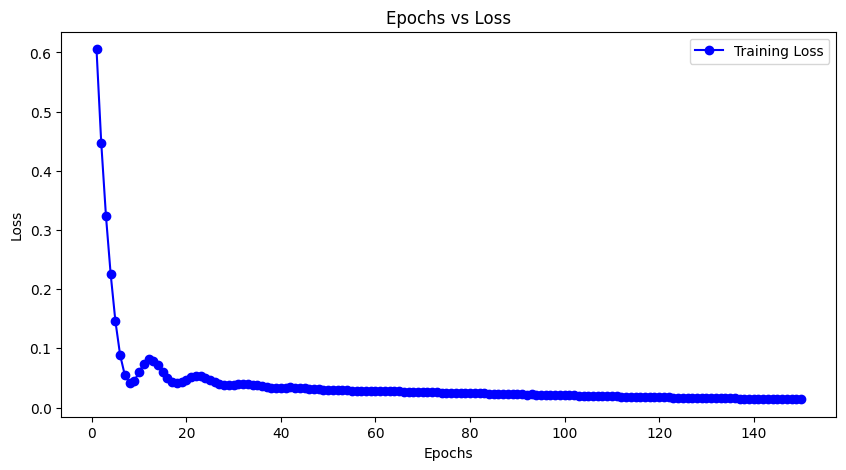

In [ ]:
plot_loss_graph(loss_list)

In [ ]:
# Example 1D tensors
print(x_tensor);

print(y_tensor);

x_tensor_d=x_tensor.squeeze()
y_tensor_d=y_tensor.squeeze()




# Ensure the tensors are 1D and have the same length
assert x_tensor_d.ndim == 1 and y_tensor_d.ndim == 1
assert len(x_tensor) == len(y_tensor)

# Create the mask and apply it
mask = x_tensor_d > 0.5
x_tensor3 = x_tensor_d[mask]
y_tensor3 = y_tensor_d[mask]


print(len(x_tensor_d));
print(len(x_tensor3));


tensor([[0.6989],
        [0.4791],
        [0.6601],
        ...,
        [0.3844],
        [0.4851],
        [0.2436]], grad_fn=<IndexBackward0>)
tensor([0.5642, 0.7461, 0.6896,  ..., 0.4624, 0.4966, 0.5492])
58520
15629


**RESULT - Prediction vs Actual**

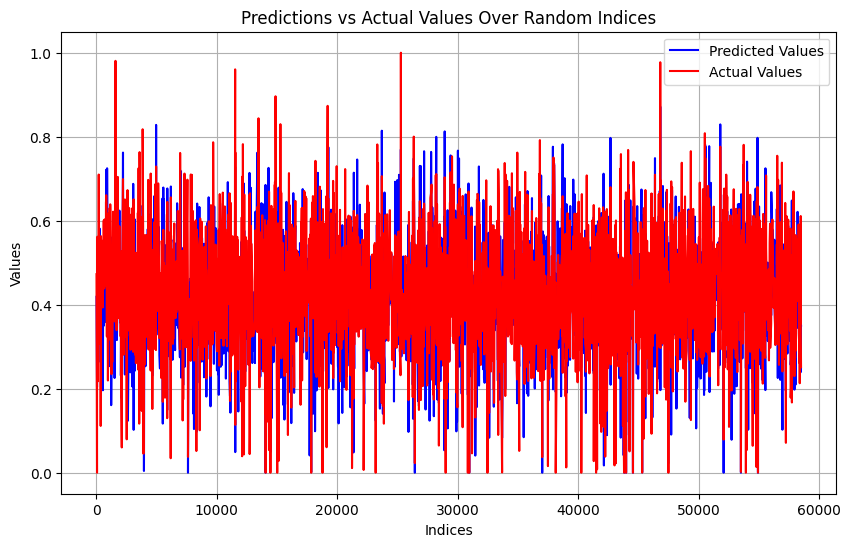

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



random_indices = np.random.choice(len(x_tensor),3000, replace=False)
random_indices_sorted = np.sort(random_indices)

# Select elements from tensor_x and tensor_y based on these indices
selected_tensor_x = x_tensor2[random_indices].detach()
selected_tensor_y = y_tensor[random_indices].detach()

plt.figure(figsize=(10, 6))

# Plotting the lines
plt.plot(random_indices_sorted, selected_tensor_x.numpy(), label='Predicted Values', color='blue')
plt.plot(random_indices_sorted, selected_tensor_y.numpy(), label='Actual Values', color='red')

plt.title("Predictions vs Actual Values Over Random Indices")
plt.xlabel("Indices")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(x_tensor);
print(x_tensor.max)
print(y_tensor);
x_tensor2=x_tensor

x_tensor2[x_tensor2 < 0] = 0

tensor([[0.4700],
        [0.7215],
        [0.5093],
        ...,
        [0.3353],
        [0.2420],
        [0.3659]], grad_fn=<IndexBackward0>)
<built-in method max of Tensor object at 0x7f3899a5b3d0>
tensor([0.5642, 0.7461, 0.6896,  ..., 0.4624, 0.4966, 0.5492])


RESULT = TSNE Embeding

In [ ]:

print(x_tensor_emb)
print(x_tensor_emb.shape )
print(y_tensor_emb)
print(y_tensor_emb.shape )

y_mask=y_tensor_emb<1
y_tensor_emb2=y_tensor_emb[y_mask]
x_tensor_emb2=x_tensor_emb[y_mask]
rounded_y_tensor_emb2 = torch.round(y_tensor_emb2  * 10) / 10

print(x_tensor_emb2 )
print(y_tensor_emb2  )

print(rounded_y_tensor_emb2 )

tensor([[-0.2948, -0.4478, -0.3227,  ...,  0.0200, -0.1019,  0.0765],
        [-0.4129, -0.5423, -0.4624,  ..., -0.0347, -0.3161,  0.2571],
        [-0.5099, -0.4449, -0.5529,  ...,  0.0368, -0.2472,  0.2859],
        ...,
        [ 0.0910, -0.6643, -0.1028,  ...,  0.0265, -0.4432, -0.1011],
        [ 0.2561, -0.8632,  0.0428,  ...,  0.0167, -0.6188, -0.2261],
        [ 0.0392, -0.3498,  0.0255,  ...,  0.0383, -0.5444, -0.1964]],
       grad_fn=<IndexBackward0>)
torch.Size([58520, 7])
tensor([0.5642, 0.7461, 0.6896,  ..., 0.4624, 0.4966, 0.5492])
torch.Size([58520])
tensor([[-0.2948, -0.4478, -0.3227,  ...,  0.0200, -0.1019,  0.0765],
        [-0.4129, -0.5423, -0.4624,  ..., -0.0347, -0.3161,  0.2571],
        [-0.5099, -0.4449, -0.5529,  ...,  0.0368, -0.2472,  0.2859],
        ...,
        [ 0.0910, -0.6643, -0.1028,  ...,  0.0265, -0.4432, -0.1011],
        [ 0.2561, -0.8632,  0.0428,  ...,  0.0167, -0.6188, -0.2261],
        [ 0.0392, -0.3498,  0.0255,  ...,  0.0383, -0.5444, -0.1

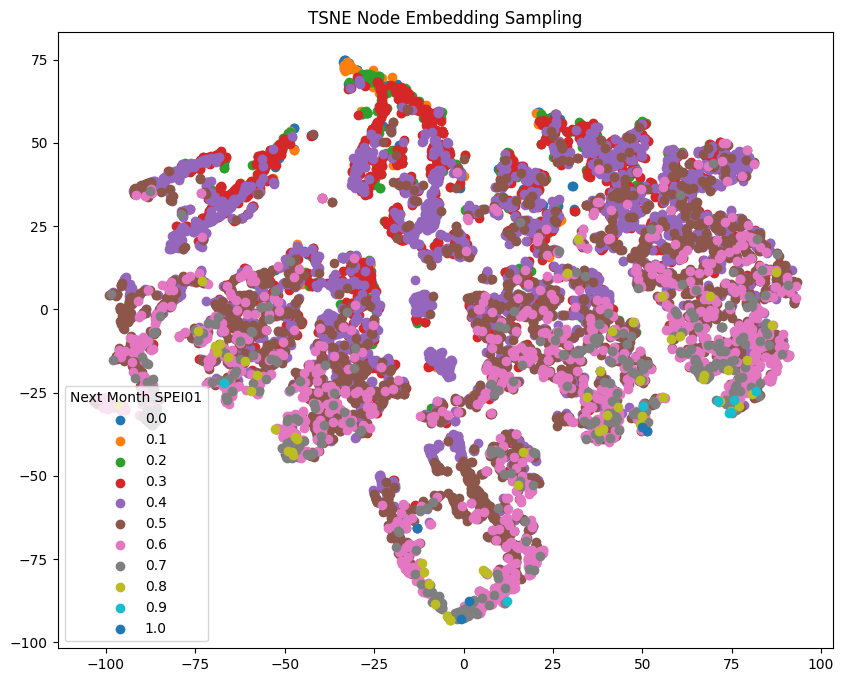

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

# Assuming x_tensor is your original large tensor
x_tensor =x_tensor_emb2  # Replace with your large tensor



# Assuming labels is a tensor or array of labels corresponding to each data point in x_tensor
labels = rounded_y_tensor_emb2
# Define the sample size
sample_size = 10000  # Adjust this to your desired sample size

# Ensure the sample size is not larger than the number of data points
if sample_size > x_tensor.size(0):
    sample_size = x_tensor.size(0)

# Randomly sample indices
indices = torch.randperm(x_tensor.size(0))[:sample_size]

# Select the samples and corresponding labels
sampled_x_tensor = x_tensor[indices]
sampled_labels = labels[indices]

# Detach and move to CPU, then convert to NumPy array
X_np = sampled_x_tensor.detach().cpu().numpy()

# Create a t-SNE instance: you can adjust parameters
tsne = TSNE(n_components=2, random_state=142)

# Apply t-SNE to the sampled data
X_2d = tsne.fit_transform(X_np)

# Plot the transformed sampled data with labels
plt.figure(figsize=(10, 8))
for label in torch.unique(sampled_labels):
    idx = (sampled_labels == label)
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1],  label=f'{label:.1f}')

plt.title("TSNE Node Embedding Sampling")

plt.legend(title="Next Month SPEI01", loc='lower left')
plt.show()


**Save Result**

In [ ]:
print(x_tensor_test)


tensor([[0.4322],
        [0.4411],
        [0.4319],
        ...,
        [0.3534],
        [0.3389],
        [0.3014]], device='cuda:0')


In [ ]:
print ( y_tensor_test)

tensor([0.4217, 0.4300, 0.4215,  ..., 0.3055, 0.2828, 0.2375], device='cuda:0')


In [ ]:
graph_data

Data(x=[83580, 17], edge_index=[2, 129700], y=[83580], train_mask=[83580], val_mask=[83580], test_mask=[83580], emb_mask=[83580])

In [ ]:
import pandas as pd
import torch
import numpy as np



# Assuming x_tensor_test and y_tensor_test are PyTorch tensors
# Example:
# x_tensor_test = torch.tensor([1.1, 2.2, 3.3])
# y_tensor_test = torch.tensor([1.0, 2.0, 3.0])

feature_column_names  = [  'Month', 'Lat', 'Lon','Lat_nom', 'Lon_nom','temperature_2m',  'u_component_of_wind_10m',
                 'v_component_of_wind_10m', 'surface_net_solar_radiation_sum', 'total_evaporation_sum',
                 'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI', 'next_month_tempreature',
                 'next_month_precipitation',    'spei01' ]

feature_column_names  = [  'temperature_2m',  'u_component_of_wind_10m',
                 'v_component_of_wind_10m', 'surface_net_solar_radiation_sum', 'total_evaporation_sum',
                 'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI', 'next_month_tempreature',
                 'next_month_precipitation',    'spei01' ]

# Convert tensors to numpy arrays
x_features = graph_data.x.cpu().detach().numpy()  # Node features
y_actual = graph_data.y.cpu().detach().numpy()    # Actual values
test_mask = graph_data.test_mask.cpu().numpy()    # Test mask

# Apply test mask
x_features_test = x_features[test_mask]
y_actual_test = y_actual[test_mask]

# Assuming x_tensor_test is your predicted values tensor for the test set
# x_tensor_test = torch.tensor([...])

predicted_test = x_tensor_test.cpu().detach().numpy()
actual_test = y_tensor_test.cpu().detach().numpy()

# Create a DataFrame
# predicted_test = x_tensor_test.numpy()
# actual_test = y_tensor_test.numpy()

# Create a DataFrame
df_columns = [f'Feature_{i}' for i in range(x_features_test.shape[1])] + ['Predicted', 'Actual', 'Actual_org']

df_columns = feature_column_names + ['Predicted', 'Actual', 'Actual_org']


df_data = np.hstack((x_features_test, predicted_test.reshape(-1, 1), actual_test.reshape(-1, 1), y_actual_test.reshape(-1, 1)))
df = pd.DataFrame(df_data, columns=df_columns)

# Save the DataFrame to a file
file_path = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2.csv'  # Adjust the path as needed
df.to_csv(file_path, index=False)

print(f'DataFrame saved to {file_path}')


DataFrame saved to /content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2.csv


**Retrieve Result**

In [ ]:
import pandas as pd
import numpy as np

# Define the file path (adjust this to the location of your saved file)
file_path = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2.csv'

# Load the DataFrame from the saved file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

# Use the .describe() method to get a statistical summary of the DataFrame
description = df.describe()

# Print the description
print(description)

      Month     Lat     Lon  Lat_nom   Lon_nom  temperature_2m  \
0  202206.0 -33.238  18.865      0.0  0.526321        0.334201   
1  202206.0 -33.238  20.661      0.0  0.552628        0.271991   
2  202206.0 -33.238  22.458      0.0  0.578949        0.292366   
3  202206.0 -33.238  24.255      0.0  0.605270        0.308521   
4  202206.0 -33.238  26.051      0.0  0.631577        0.331718   

   u_component_of_wind_10m  v_component_of_wind_10m  \
0                 0.424086                 0.414068   
1                 0.494057                 0.342901   
2                 0.462789                 0.372334   
3                 0.549707                 0.381113   
4                 0.508391                 0.350324   

   surface_net_solar_radiation_sum  total_evaporation_sum  soil_moisture_am  \
0                         0.278462               0.846060          0.365647   
1                         0.300742               0.934387          0.168256   
2                         0.302574 

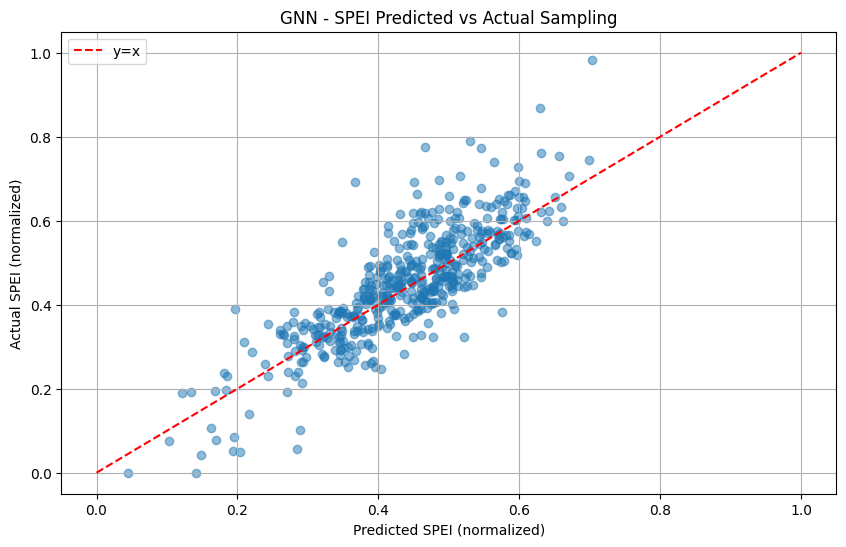

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the saved file
file_path = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2.csv'

df = pd.read_csv(file_path)


# Sample 100 points from the DataFrame
sampled_df = df.sample(n=500, random_state=42)  # Set random_state for reproducibility
#sampled_df=df3
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['Predicted'], sampled_df['Actual'], alpha=0.5)

# Add a 45-degree line (y = x)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y=x')

plt.title('GNN - SPEI Predicted vs Actual Sampling')
plt.xlabel('Predicted SPEI (normalized)')
plt.ylabel('Actual SPEI (normalized)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



# Calculate MSE
mse = mean_squared_error(df['Actual'], df['Predicted'])

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(df['Actual'], df['Predicted'])

# Calculate R-squared Score
r2 = r2_score(df['Actual'], df['Predicted'])

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


MSE: 0.0064205840314538925
RMSE: 0.08012854691964588
MAE: 0.060146991184721096
R-squared: 0.6827435078888078


In [ ]:
!pip install geopy

In [ ]:
!pip install geopython

In [ ]:
key = "ce5ba22da7ea4f5ca295f0c332674a19"


In [ ]:
import pandas as pd
from geopy.geocoders import OpenCage

# Example DataFrame with Lat and Lon columns
# df = pd.DataFrame({'Lat': [lat_values], 'Lon': [lon_values]})

# Create a dictionary to serve as a cache for reverse geocoding results
reverse_geocode_cache = {}

# Define a function for reverse geocoding to get country names using OpenCage
def reverse_geocode(lat, lon, key):
    # Check if the result is already cached
    if (lat, lon) in reverse_geocode_cache:
        return reverse_geocode_cache[(lat, lon)]

    geolocator = OpenCage(api_key=key)
    location = geolocator.reverse((lat, lon), exactly_one=True)
    print ("Lat ", lat)
    print ("Lon ", lon)
    print ("location ", location)
    print ("location ", location.raw)
    #print ("location ", location.raw['address'])
    print ("location ", location.raw['components'].get('country'))

    if location and 'components' in location.raw:
        country = location.raw['components'].get('country')
        country_code = location.raw['components'].get('country_code:')
        # Cache the result to avoid future API calls for the same coordinates
        reverse_geocode_cache[(lat, lon)] = country
        print("!!!country ", country)
        return country
    else:
        return 'Unknown'  # Default value for unknown locations

# Replace 'YOUR_OPENCAGE_API_KEY' with your actual OpenCage API key
api_key = key

# Apply the reverse geocoding function to get country names for each distinct pair of Lat and Lon
unique_coordinates = df[['Lat', 'Lon']].drop_duplicates()
print(unique_coordinates)
print(unique_coordinates.size)
unique_coordinates['Country'] = unique_coordinates.apply(lambda row: reverse_geocode(row['Lat'], row['Lon'], api_key), axis=1)
print ("reverse request done")
# Merge the unique_coordinates DataFrame back into the original DataFrame using Lat and Lon as keys
df = df.merge(unique_coordinates, on=['Lat', 'Lon'], how='left')

# Print the updated DataFrame with the added 'Country' column
print(df)


Streaming output truncated to the last 5000 lines.
!!!country  South Africa
Lat  -29.644
Lon  18.865
location  Khâi-Ma Ward 4, Khâi-Ma Local Municipality, 8890, South Africa
location  {'annotations': {'DMS': {'lat': "29° 41' 25.04472'' S", 'lng': "19° 11' 7.62504'' E"}, 'MGRS': '34JCN2443514154', 'Maidenhead': 'JG90oh24gh', 'Mercator': {'x': 2135714.676, 'y': -3442641.099}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=3578269#map=17/-29.69029/19.18545', 'note_url': 'https://www.openstreetmap.org/note/new#map=17/-29.69029/19.18545&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=-29.69029&mlon=19.18545#map=17/-29.69029/19.18545'}, 'UN_M49': {'regions': {'AFRICA': '002', 'SOUTHERN_AFRICA': '018', 'SUB-SAHARAN_AFRICA': '202', 'WORLD': '001', 'ZA': '710'}, 'statistical_groupings': ['LEDC']}, 'callingcode': 27, 'currency': {'alternate_symbols': [], 'decimal_mark': ',', 'html_entity': '&#x0052;', 'iso_code': 'ZAR', 'iso_numeric': '710', 'name': 'South African Rand',

In [ ]:
 df = df.rename(columns={"Country_y": "Country"})

In [ ]:
print(df)

          Month     Lat     Lon  Lat_nom   Lon_nom  temperature_2m  \
0      202206.0 -33.238  18.865      0.0  0.526321        0.334201   
1      202206.0 -33.238  20.661      0.0  0.552628        0.271991   
2      202206.0 -33.238  22.458      0.0  0.578949        0.292366   
3      202206.0 -33.238  24.255      0.0  0.605270        0.308521   
4      202206.0 -33.238  26.051      0.0  0.631577        0.331718   
...         ...     ...     ...      ...       ...             ...   
12427  202308.0  36.831   2.695      1.0  0.289474        0.667945   
12428  202308.0  36.831   4.492      1.0  0.315796        0.647545   
12429  202308.0  36.831   6.288      1.0  0.342102        0.653019   
12430  202308.0  36.831   8.085      1.0  0.368423        0.668234   
12431  202308.0  36.831   9.881      1.0  0.394730        0.682846   

       u_component_of_wind_10m  v_component_of_wind_10m  \
0                     0.424086                 0.414068   
1                     0.494057           

In [ ]:
file_path2 = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2_with_countryname.csv'
df.to_csv(file_path2, index=False)


In [ ]:
unique_coordinates

Lat     Lon  Country
0    -33.238  18.865  Unknown
1    -33.238  20.661  Unknown
2    -33.238  22.458  Unknown
3    -33.238  24.255  Unknown
4    -33.238  26.051  Unknown
...      ...     ...      ...
876  -24.255  26.051  Unknown
896  -22.458  35.034  Unknown
928  -18.865  35.034  Unknown
1309  11.678  42.221  Unknown
1556  27.848 -15.271  Unknown

[836 rows x 3 columns]

<ipython-input-273-3aeb4ba89646>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


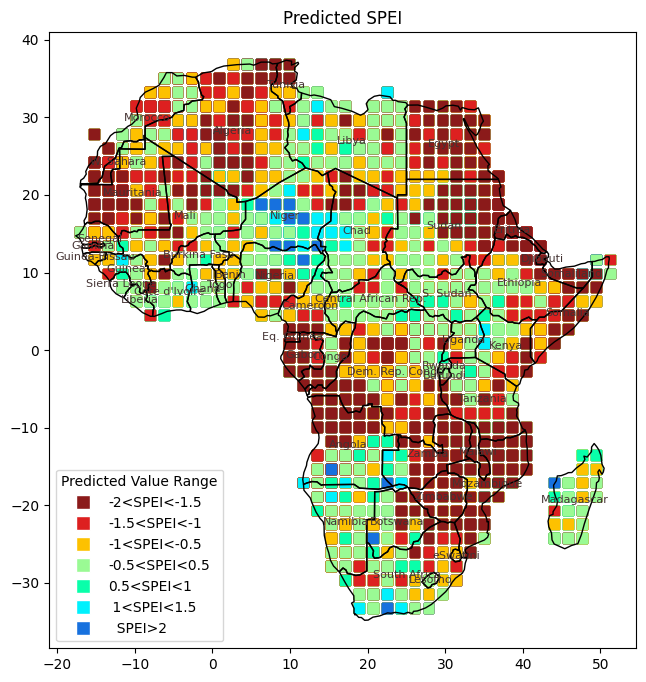

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with Lat, Lon, Country, and Predicted columns
# df = pd.DataFrame({'Lat': [lat_values], 'Lon': [lon_values], 'Country': [country_names], 'Predicted': [predicted_values]})
file_path2 = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2_with_countryname.csv'
df = pd.read_csv(file_path2)
# Load the world map dataset with country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lon'], df['Lat']))

# Define colors based on predicted values
colors = []
for value in df['Predicted']:
    if value <= 0.35:
        colors.append('#8B1A1A')  # Dark Red
    elif value <= 0.4:
        colors.append('#DD2020')  # Red-Orange
    elif value <= 0.45:
        colors.append('#FDC100')  # Dark Orange
    elif value <= 0.55:
        colors.append('#9AFA94')  # Gold
    elif value <= 0.6:
        colors.append('#09FFAA')  # Yellow
    elif value <= 0.65:
        colors.append('#00F1FD')  # Orange
    elif value <=   1:
        colors.append('#1771DE')  # Dark Orange
    else:
        print("value is", value);
        colors.append('#FF0000')  # Dark Red (fallback)

# Create a subplot for the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the filtered African map with country borders and country names
africa.boundary.plot(ax=ax, linewidth=1, color='black')
for idx, row in africa.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#443333')

# Plot the GeoDataFrame with the defined colors based on predicted values and add a legend
sc = gdf.plot(color=colors, ax=ax, marker='s',markersize=50, legend=True, legend_kwds={'label': "Predicted Value"})

# Create a legend for the colors and their corresponding values
legend_labels = {
    '#8B1A1A': 'SPEI<-2',
    '#8B1A1A': '-2<SPEI<-1.5',
    '#DD2020': '-1.5<SPEI<-1',
    '#FDC100': '-1<SPEI<-0.5',
    '#9AFA94': '-0.5<SPEI<0.5',
    '#09FFAA': '0.5<SPEI<1',
    '#00F1FD': ' 1<SPEI<1.5',
    '#1771DE': ' 1.5<SPEI<2',
    '#1771DE': '  SPEI>2',
}
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
           for color, label in legend_labels.items()]

# Add the legend to the plot
ax.legend(handles=handles, title="Predicted Value Range")

# Set title
plt.title('Predicted SPEI')

# Show the map
plt.show()


<ipython-input-271-8720fdcebe7f>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


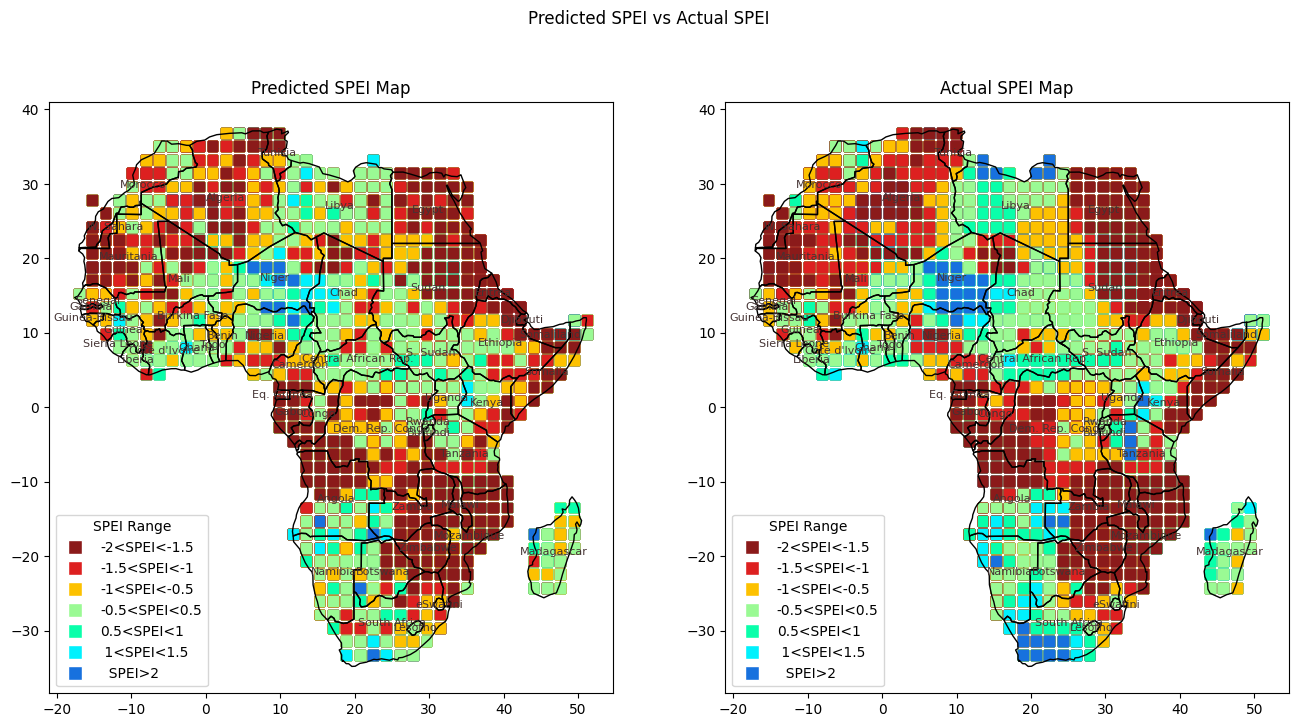

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with Lat, Lon, Country, Predicted, and Actual columns
# df = pd.DataFrame({'Lat': [lat_values], 'Lon': [lon_values], 'Country': [country_names], 'Predicted': [predicted_values], 'Actual': [actual_values]})
file_path2 = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2_with_countryname.csv'
df = pd.read_csv(file_path2)
# Load the world map dataset with country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lon'], df['Lat']))

# Define colors based on predicted values
predicted_colors = []
for value in df['Predicted']:
    if value <= 0.35:
        predicted_colors.append('#8B1A1A')  # Dark Red
    elif value <= 0.4:
        predicted_colors.append('#DD2020')  # Red-Orange
    elif value <= 0.45:
        predicted_colors.append('#FDC100')  # Dark Orange
    elif value <= 0.55:
        predicted_colors.append('#9AFA94')  # Gold
    elif value <= 0.6:
        predicted_colors.append('#09FFAA')  # Yellow
    elif value <= 0.65:
        predicted_colors.append('#00F1FD')  # Orange
    elif value <= 1:
        predicted_colors.append('#1771DE')  # Dark Orange
    else:
        print("value is", value)
        predicted_colors.append('#FF0000')  # Dark Red (fallback)

# Define colors based on actual values
actual_colors = []
for value in df['Actual']:
    if value <= 0.35:
        actual_colors.append('#8B1A1A')  # Dark Red
    elif value <= 0.4:
        actual_colors.append('#DD2020')  # Red-Orange
    elif value <= 0.45:
        actual_colors.append('#FDC100')  # Dark Orange
    elif value <= 0.55:
        actual_colors.append('#9AFA94')  # Gold
    elif value <= 0.6:
        actual_colors.append('#09FFAA')  # Yellow
    elif value <= 0.65:
        actual_colors.append('#00F1FD')  # Orange
    elif value <= 1:
        actual_colors.append('#1771DE')  # Dark Orange
    else:
        print("value is", value)
        actual_colors.append('#FF0000')  # Dark Red (fallback)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the filtered African map with country borders and country names for both subplots
for ax in axs:
    africa.boundary.plot(ax=ax, linewidth=1, color='black')
    for idx, row in africa.iterrows():
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#443333')

# Plot the GeoDataFrame with the defined colors based on predicted values and actual values
gdf.plot(color=predicted_colors, ax=axs[0], marker='s', markersize=50, legend=True, legend_kwds={'label': "Predicted SPEI"})
gdf.plot(color=actual_colors, ax=axs[1], marker='s', markersize=50, legend=True, legend_kwds={'label': "Actual SPEI"})


 # Create a legend for the colors and their corresponding values
legend_labels = {
    '#8B1A1A': 'SPEI<-2',
    '#8B1A1A': '-2<SPEI<-1.5',
    '#DD2020': '-1.5<SPEI<-1',
    '#FDC100': '-1<SPEI<-0.5',
    '#9AFA94': '-0.5<SPEI<0.5',
    '#09FFAA': '0.5<SPEI<1',
    '#00F1FD': ' 1<SPEI<1.5',
    '#1771DE': ' 1.5<SPEI<2',
    '#1771DE': '  SPEI>2',
}
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
           for color, label in legend_labels.items()]

# Add the legend to the plot
axs[0].legend(handles=handles, title="SPEI Range")
axs[1].legend(handles=handles, title="SPEI Range")

# Set titles for subplots
axs[0].set_title('Predicted SPEI Map')
axs[1].set_title('Actual SPEI Map')

# Add an overall title
plt.suptitle("Predicted SPEI vs Actual SPEI")

# Show the plot
plt.show()


<ipython-input-265-5f9fd31e7b3c>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


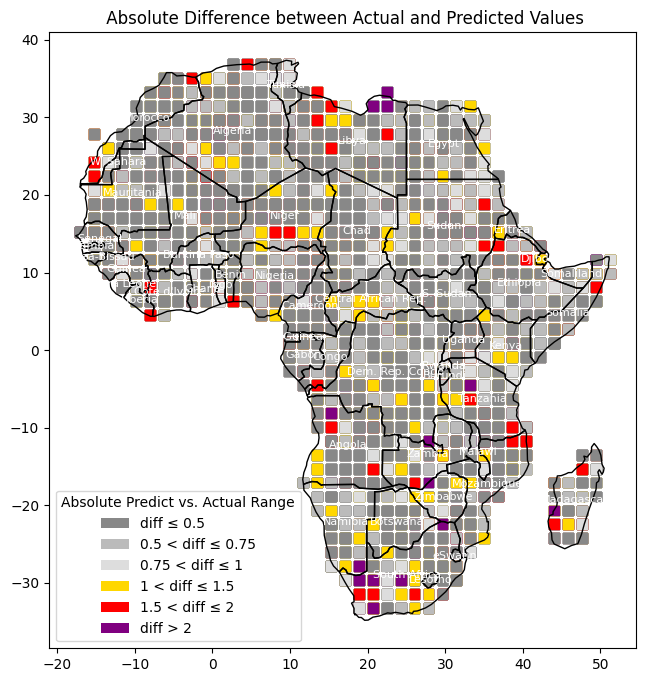

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Example DataFrame with Lat, Lon, Country, Predicted, and Actual columns
# df = pd.DataFrame({'Lat': [lat_values], 'Lon': [lon_values], 'Country': [country_names], 'Predicted': [predicted_values], 'Actual': [actual_values]})
file_path2 = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2_with_countryname.csv'
df = pd.read_csv(file_path2)
# Load the world map dataset with country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lon'], df['Lat']))

# Calculate the absolute difference between actual and predicted values
gdf['Absolute_Difference'] = abs(gdf['Actual'] - gdf['Predicted'])

# Define colors based on the absolute difference values
difference_colors = []
for value in gdf['Absolute_Difference']:
    if value <= 0.05:
        difference_colors.append('#888888')  # Dark Green for absolute difference <= 0.05
    elif value <= 0.075:
        difference_colors.append('#BBBBBB')  # Yellow-Green for absolute difference <= 0.075
    elif value <= 0.1:
        difference_colors.append('#DDDDDD')  # Gold for absolute difference <= 0.1
    elif value <= 0.15:
        difference_colors.append('#FFD700')  # Red-Orange for absolute difference <= 0.15
    elif value <= 0.2:
        difference_colors.append('#FF0000')  # Dark Red for absolute difference <= 0.2
    else:
        difference_colors.append('#800080')  # Purple for absolute difference > 0.2

# Create a subplot for the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the filtered African map with country borders and country names
africa.boundary.plot(ax=ax, linewidth=1, color='black')
for idx, row in africa.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#FFFFFF')

# Plot the GeoDataFrame with the defined colors based on the absolute difference values
sc = gdf.plot(color=difference_colors, ax=ax, marker='s', markersize=50)

# Define legend labels and colors
legend_labels = {
    'diff ≤ 0.5': '#888888',  # Dark Green for absolute difference <= 0.05
    '0.5 < diff ≤ 0.75': '#BBBBBB',  # Yellow-Green for absolute difference <= 0.075
    '0.75 < diff ≤ 1': '#DDDDDD',  # Gold for absolute difference <= 0.1
    '1 < diff ≤ 1.5': '#FFD700',  # Red-Orange for absolute difference <= 0.15
    '1.5 < diff ≤ 2': '#FF0000',  # Dark Red for absolute difference <= 0.2
    'diff > 2': '#800080',  # Purple for absolute difference > 0.2
}

# Create a legend with color patches and labels
legend_elements = [Patch(facecolor=color, label=label) for label, color in legend_labels.items()]
legend = ax.legend(handles=legend_elements, title='Absolute Predict vs. Actual Range', loc='lower left')

# Set title
plt.title(' Absolute Difference between Actual and Predicted Values')

# Show the map
plt.show()


<ipython-input-288-66416ffea895>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


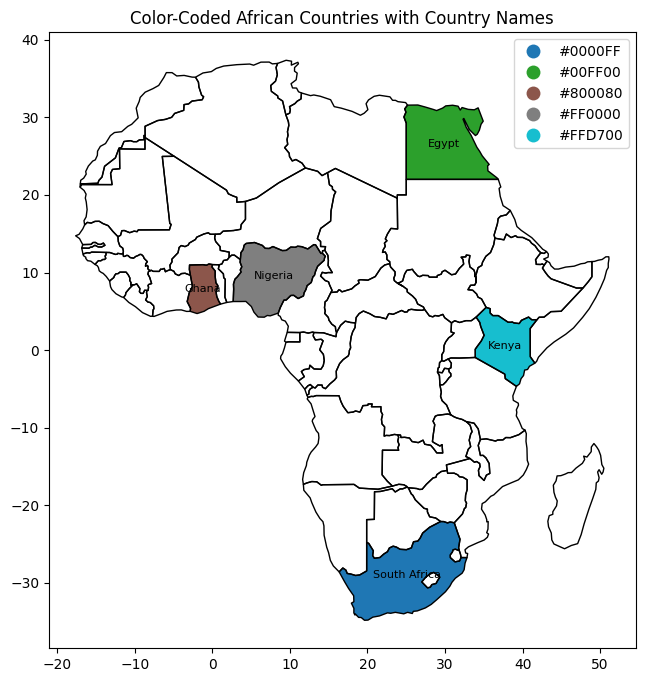

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map dataset with country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Sample DataFrame with African country names and associated solid colors
data = {
    'Country': ['Nigeria', 'Egypt', 'South Africa', 'Kenya', 'Ghana'],
    'Color': ['#FF0000', '#00FF00', '#0000FF', '#FFD700', '#800080']
}

sample_df = pd.DataFrame(data)

# Merge the GeoDataFrame with the sample DataFrame based on country names
africa_with_colors = africa.merge(sample_df, left_on='name', right_on='Country')

# Create a subplot for the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the African map with country boundaries and fill colors
africa.boundary.plot(ax=ax, linewidth=1, color='black')
africa_with_colors.plot(column='Color', ax=ax, legend=True)

# Add country names within the country boundaries
for idx, row in africa_with_colors.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#000000')

# Set title
plt.title('Color-Coded African Countries with Country Names')

# Show the map
plt.show()
